# **Project Name**    - Flipkart Analysis Project

# Import Libraries

### Install required packages and import libraries for ML, preprocessing, and visualization.

In [ ]:
!pip install scikit-learn xgboost seaborn matplotlib pandas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb


# Load Dataset
### Read the CSV file into a pandas DataFrame for exploration and modeling.

In [ ]:
df = pd.read_csv(r"/content/Customer_support_data.csv")

df.head()


/usr/local/lib/python3.12/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


In [ ]:
print("Dataset Shape:", df.shape)

Dataset Shape: (85907, 20)


# Cell 3: Inspect Dataset
### Check data types, missing values, and class balance of target column.

In [ ]:
df.columns

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unique id,0
channel_name,0
category,0
Sub-category,0
Customer Remarks,57165
Order_id,18232
order_date_time,68693
Issue_reported at,0
issue_responded,0
Survey_response_Date,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

In [ ]:
df["Customer Remarks"].value_counts()

,count
Customer Remarks,
Good,1390
Good,1158
Very good,569
Nice,316
Thanks,276
...,...
Please add option to delete order history,1
Me,1
Delivery person call back received,1


In [ ]:
df["Unique id"]

,Unique id
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16
2,200814dd-27c7-4149-ba2b-bd3af3092880
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135
4,ba903143-1e54-406c-b969-46c52f92e5df
...,...
85902,505ea5e7-c475-4fac-ac36-1d19a4cb610f
85903,44b38d3f-1523-4182-aba2-72917586647c
85904,723bce2c-496c-4aa8-a64b-ca17004528f0
85905,707528ee-6873-4192-bfa9-a491f1c08ab5


In [ ]:
df["channel_name"].value_counts()

,count
channel_name,
Inbound,68142
Outcall,14742
Email,3023


In [ ]:
df["Item_price"].value_counts()

,count
Item_price,
999.0,590
1499.0,326
899.0,309
1299.0,301
799.0,283
...,...
4974.0,1
4065.0,1
3674.0,1


In [ ]:
df["connected_handling_time"].value_counts()

,count
connected_handling_time,
299.0,3
301.0,3
418.0,3
282.0,3
368.0,2
...,...
63.0,1
281.0,1
856.0,1


In [ ]:
# Drop non-useful columns before modeling
cols_to_drop = [
    "Unique id",
    "Order_id",
    "order_date_time",
    "Survey_response_Date",
    "Agent_name",
    "Supervisor",
    "Manager",
    "Item_price",
    "connected_handling_time",
    "Customer Remarks"   # drop for now (NLP optional later)
]

df = df.drop(columns=cols_to_drop, errors="ignore")

print("Remaining columns:", df.columns.tolist())


Remaining columns: ['channel_name', 'category', 'Sub-category', 'Issue_reported at', 'issue_responded', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift', 'CSAT Score']


In [ ]:
df.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Customer_City', 'Product_category', 'Tenure Bucket',
       'Agent Shift', 'CSAT Score'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   channel_name       85907 non-null  object
 1   category           85907 non-null  object
 2   Sub-category       85907 non-null  object
 3   Issue_reported at  85907 non-null  object
 4   issue_responded    85907 non-null  object
 5   Customer_City      17079 non-null  object
 6   Product_category   17196 non-null  object
 7   Tenure Bucket      85907 non-null  object
 8   Agent Shift        85907 non-null  object
 9   CSAT Score         85907 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 6.6+ MB


In [ ]:
print(df["CSAT Score"].value_counts())

CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64


## Check class distribution

/tmp/ipython-input-3365557004.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="Set2")


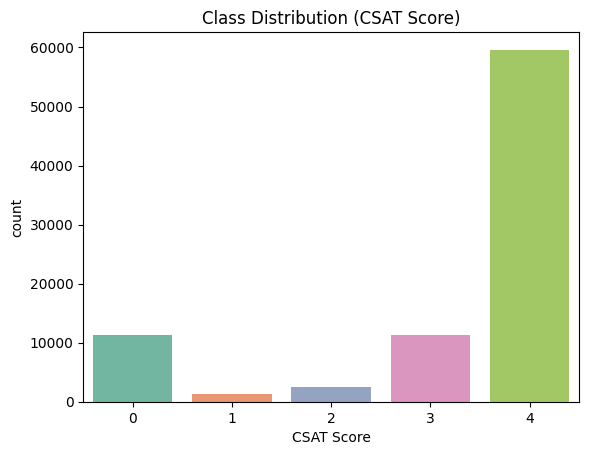

In [ ]:
sns.countplot(x=y, palette="Set2")
plt.title("Class Distribution (CSAT Score)")
plt.show()

# Define Features & Target
### Separate independent variable (X) from the dependent or target variable (y).

In [ ]:
df["CSAT Score"] = df["CSAT Score"].fillna(df["CSAT Score"].median())   ### There is one missing value in CSAT Score

In [ ]:
# 1. Separate features and target
y = df["CSAT Score"].fillna(0).astype(int) - 1   # shift to 0–4
X = df.drop(columns=["CSAT Score"])

In [ ]:
# Identify categorical & numerical columns
categorical_cols = X.select_dtypes(include=["object"]).columns.tolist()
numerical_cols   = X.select_dtypes(include=["int64","float64"]).columns.tolist()


print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)

Categorical Columns: ['channel_name', 'category', 'Sub-category', 'Issue_reported at', 'issue_responded', 'Customer_City', 'Product_category', 'Tenure Bucket', 'Agent Shift']
Numerical Columns: []


In [ ]:
numerical_cols

[]

In [ ]:
X.columns

Index(['channel_name', 'category', 'Sub-category', 'Issue_reported at',
       'issue_responded', 'Customer_City', 'Product_category', 'Tenure Bucket',
       'Agent Shift'],
      dtype='object')

# Train/Validation/Test Split
### Split dataset into train, validation, and test to evaluate fairly.

In [ ]:
# First split into train (2/3) and temp (1/3)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
# Then split temp equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train size:", X_train.shape, "Val size:", X_val.shape, "Test size:", X_test.shape)

Train size: (60134, 9) Val size: (12886, 9) Test size: (12887, 9)


# Preprocessing Pipeline
### Scale numerical columns and one-hot encode categorical columns.

In [ ]:
# Define transformers
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

In [ ]:
# Build ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

# Logistic Regression
### Simple baseline model for multi-class classification.

In [ ]:
# Final pipeline with classifier
log_reg_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight="balanced"))    ## the dataset is in-balanced
])

# Train
log_reg_pipeline.fit(X_train, y_train)

# Predict
y_val_pred_log = log_reg_pipeline.predict(X_val)


print("Logistic Regression Report: ")
print(classification_report(y_val, y_val_pred_log))

Logistic Regression Report: 
              precision    recall  f1-score   support

           0       0.21      0.29      0.24      1684
           1       0.02      0.03      0.02       193
           2       0.04      0.06      0.05       383
           3       0.14      0.17      0.16      1683
           4       0.73      0.63      0.68      8943

    accuracy                           0.50     12886
   macro avg       0.23      0.24      0.23     12886
weighted avg       0.55      0.50      0.52     12886



# Random Forest Classifier
### Strong ensemble tree-based model that handles mixed features well.

In [ ]:
rf_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=50, class_weight="balanced", random_state=42))
])

# Train
rf_model.fit(X_train, y_train)

# Predict
y_val_pred_rf = rf_model.predict(X_val)

print(" Random Forest Report")
print(classification_report(y_val, y_val_pred_rf))

 Random Forest Report
              precision    recall  f1-score   support

           0       0.38      0.02      0.03      1684
           1       0.00      0.00      0.00       193
           2       0.00      0.00      0.00       383
           3       0.12      0.00      0.00      1683
           4       0.70      1.00      0.82      8943

    accuracy                           0.69     12886
   macro avg       0.24      0.20      0.17     12886
weighted avg       0.55      0.69      0.57     12886



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# XGBoost Classifier
### Gradient boosting algorithm, often state-of-the-art for structured data.

In [ ]:
# Define categorical and numeric columns
categorical_cols = ["channel_name", "category", "Sub-category", "Issue_reported at",
                    "issue_responded", "Customer_City", "Product_category",
                    "Tenure Bucket", "Agent Shift"]

numeric_cols = [col for col in X.columns if col not in categorical_cols]

# Preprocessor
preprocessor = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols),
    ("num", "passthrough", numeric_cols)
])

# XGBoost pipeline
xgb_model = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("clf", xgb.XGBClassifier(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=6,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        tree_method="hist"   # faster training
    ))
])

# Train
xgb_model.fit(X_train, y_train)

# Predict
y_val_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Report:")
print(classification_report(y_val, y_val_pred_xgb))

XGBoost Report:
              precision    recall  f1-score   support

           0       0.49      0.02      0.04      1684
           1       0.00      0.00      0.00       193
           2       0.00      0.00      0.00       383
           3       0.33      0.00      0.00      1683
           4       0.70      1.00      0.82      8943

    accuracy                           0.69     12886
   macro avg       0.30      0.20      0.17     12886
weighted avg       0.59      0.69      0.57     12886



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Compare Models (Validation Accuracy)
### See which model performs best before final testing.

/tmp/ipython-input-2155037437.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Validation Accuracy", data=model_scores, palette="mako")


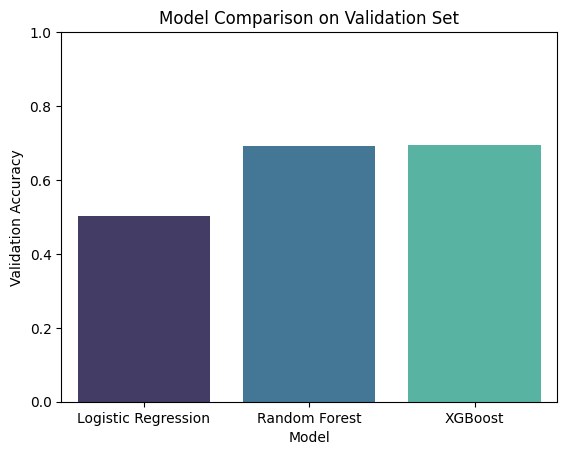

,Model,Validation Accuracy
0,Logistic Regression,0.501940
1,Random Forest,0.693000
2,XGBoost,0.694785


In [ ]:
acc_log = accuracy_score(y_val, y_val_pred_log)
acc_rf  = accuracy_score(y_val, y_val_pred_rf)
acc_xgb = accuracy_score(y_val, y_val_pred_xgb)

model_scores = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Validation Accuracy": [acc_log, acc_rf, acc_xgb]
})

sns.barplot(x="Model", y="Validation Accuracy", data=model_scores, palette="mako")
plt.title("Model Comparison on Validation Set")
plt.ylim(0,1)
plt.show()

model_scores

# Confusion Matrix Visualization
### Visualize where the models make mistakes across CSAT classes.

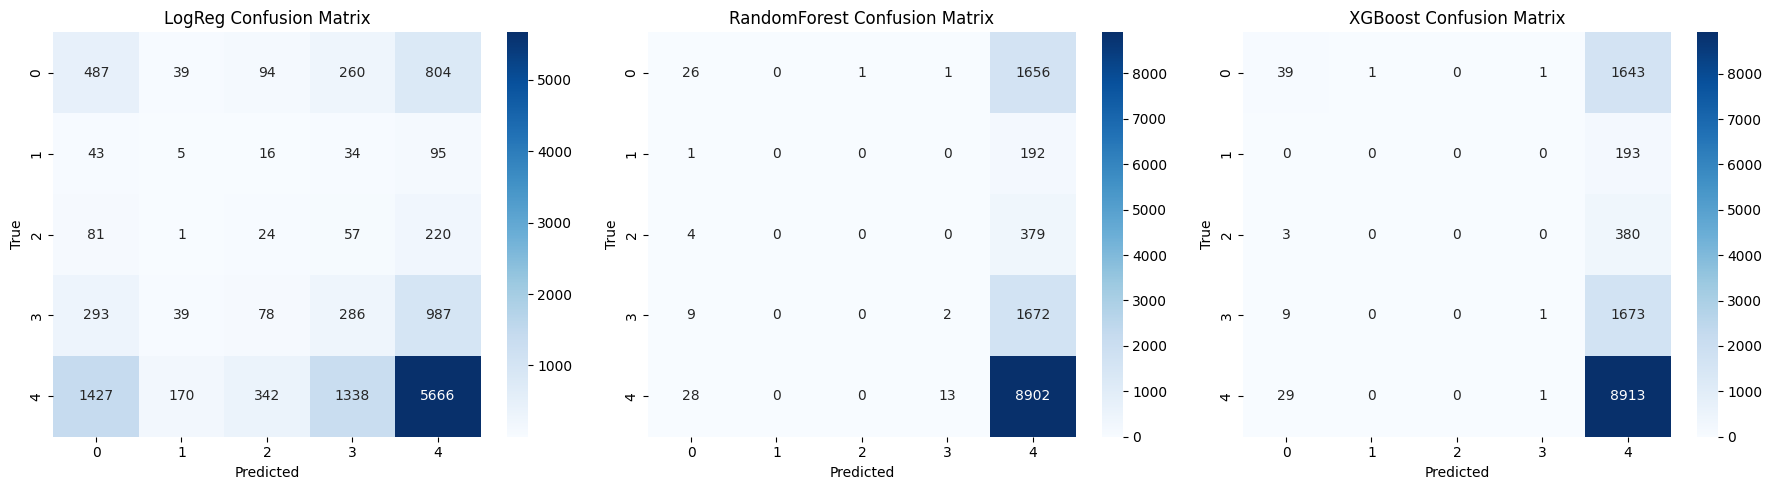

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for ax, model_name, preds in zip(
    axes, ["LogReg", "RandomForest", "XGBoost"],
    [y_val_pred_log, y_val_pred_rf, y_val_pred_xgb]
):
    cm = confusion_matrix(y_val, preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()

# Final Test Evaluation
### Select best model and evaluate on completely unseen test data.

Final Test Report
              precision    recall  f1-score   support

           0       0.25      0.01      0.02      1685
           1       0.00      0.00      0.00       192
           2       0.00      0.00      0.00       384
           3       0.26      0.00      0.01      1683
           4       0.69      0.99      0.82      8943

    accuracy                           0.69     12887
   macro avg       0.24      0.20      0.17     12887
weighted avg       0.55      0.69      0.57     12887



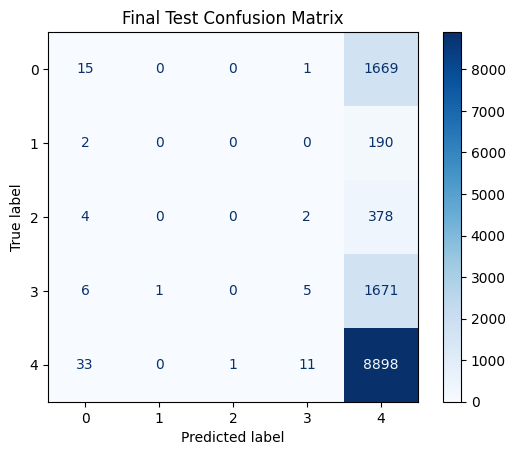

In [ ]:
best_model = rf_model   # Change to log_reg or xgb_model if better

y_test_pred = best_model.predict(X_test)

print("Final Test Report")
print(classification_report(y_test, y_test_pred))

cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(cm).plot(cmap="Blues")
plt.title("Final Test Confusion Matrix")
plt.show()

# Xgboost is the best model for better prediction as we an see above (accuracy)